In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [4]:
mnpd = gpd.read_file('../maps/mnpd_reporting_areas.geojson')
print(mnpd.crs)
mnpd.head( )

EPSG:4326


,OBJECTID,NAME,PRECINCT,geometry
0,1,2207,7,"POLYGON ((-86.78450 36.33575, -86.78426 36.335..."
1,2,2213,6,"POLYGON ((-86.85036 36.36651, -86.84958 36.366..."
2,3,2301,6,"POLYGON ((-86.84099 36.35499, -86.84089 36.354..."
3,4,3314,6,"POLYGON ((-86.79969 36.27689, -86.79957 36.276..."
4,5,2210,7,"POLYGON ((-86.79939 36.27680, -86.79957 36.276..."


In [5]:
type(mnpd)

geopandas.geodataframe.GeoDataFrame

In [6]:
print(mnpd.loc[0, 'geometry'])

POLYGON ((-86.7844988473839 36.3357539386975, -86.7842577433321 36.3357488547442, -86.7841334375599 36.3357649877579, -86.7839046392368 36.3358335515808, -86.7837049061386 36.3359470031851, -86.7835473986488 36.3361007261043, -86.7832818627162 36.3364265837423, -86.7832186089337 36.3364984135276, -86.7830517977049 36.33662469966, -86.7829555296296 36.336674767574, -86.7827431485482 36.3367420684217, -86.7825167415792 36.336764355178, -86.7823956141263 36.3367587382211, -86.7820260777526 36.3367353627963, -86.7819850851718 36.3367327700308, -86.7820600209631 36.3364685793461, -86.7822981072157 36.3358242570657, -86.7823620787053 36.3357151196361, -86.7824343326158 36.3356091144197, -86.7826035265617 36.3354113943559, -86.7826993667426 36.3353182842864, -86.7828015096843 36.3352308750478, -86.7830265663158 36.3350723763966, -86.7831480958762 36.3350022295764, -86.7835276821405 36.3347944372472, -86.783674826886 36.3347087959284, -86.7838937077778 36.3345578896932, -86.7839959153467 36.33

<Axes: >

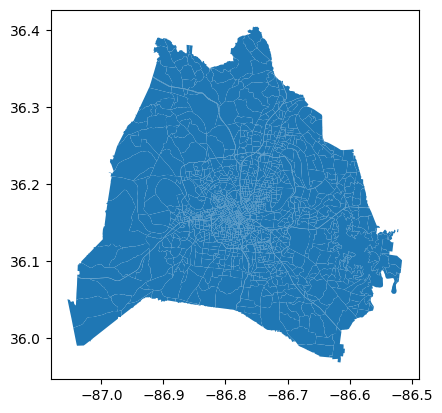

In [7]:
mnpd.plot()

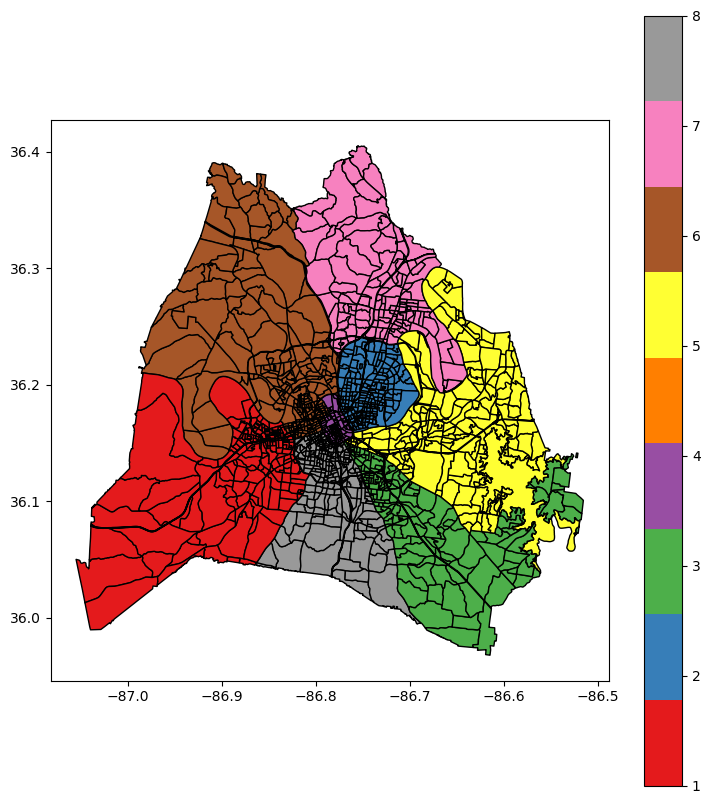

In [9]:
mnpd.plot(column = 'PRECINCT', figsize=(9, 10),
              edgecolor = 'black',
              legend = True, 
              cmap = 'Set1')
plt.show()

In [31]:
building_permit = pd.read_csv('../maps/building_permits.csv')
print(building_permit.shape)
building_permit.head(2)

(5483, 23)


,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,...,Permit SubType,IVR Tracking,Purpose,Council District,Lon,Lat,ObjectId,Zip Code,x,y
0,T2022037352,Building Residential - New,Single Family Residence,072151N00200CO,6/6/2022 5:00:00 AM,NaN,262832,2116 B BURNS ST,NASHVILLE,TN,...,CAA01R301,4166019,To construct a new HPR/duplex single family re...,7.0,-86.729776,36.196628,1,37216,-9.654715e+06,4.327711e+06
1,T2022037366,Building Residential - Rehab,Single Family Residence,11809012700,6/6/2022 5:00:00 AM,NaN,1355715,2915 SNOWDEN RD,NASHVILLE,TN,...,CAA01R301,4166040,Thomas Constructors is renovating and expandin...,25.0,-86.785267,36.112526,2,37204,-9.660892e+06,4.316116e+06


In [28]:
perm_precinct = gpd.GeoDataFrame(building_permit, 
                           crs = mnpd.crs, 
                           geometry = gpd.points_from_xy(building_permit.Lon, building_permit.Lat))

In [29]:
type(building_permit)

pandas.core.frame.DataFrame

In [30]:
mnpd = mnpd[['PRECINCT', 'NAME', 'geometry']]

In [32]:
perm_by_precinct = gpd.sjoin(perm_precinct, mnpd, predicate = 'within')

In [33]:
perm_by_precinct.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,...,Lon,Lat,ObjectId,Zip Code,x,y,geometry,index_right,PRECINCT,NAME
0,T2022037352,Building Residential - New,Single Family Residence,072151N00200CO,6/6/2022 5:00:00 AM,NaN,262832,2116 B BURNS ST,NASHVILLE,TN,...,-86.729776,36.196628,1,37216,-9.654715e+06,4.327711e+06,POINT (-86.72978 36.19663),1533,2,1405
1,T2022037366,Building Residential - Rehab,Single Family Residence,11809012700,6/6/2022 5:00:00 AM,NaN,1355715,2915 SNOWDEN RD,NASHVILLE,TN,...,-86.785267,36.112526,2,37204,-9.660892e+06,4.316116e+06,POINT (-86.78527 36.11253),2042,8,7003
2,T2022037375,Building Demolition Permit,Demolition Permit - Residential,103140I00200CO,6/6/2022 5:00:00 AM,NaN,8000,80 B BROOKWOOD TER,NASHVILLE,TN,...,-86.859827,36.130455,3,37205,-9.669192e+06,4.318587e+06,POINT (-86.85983 36.13045),711,1,5019
3,T2022037536,Building Residential - Rehab,"Multifamily, Tri-Plex, Quad, Apartments",09112025100,6/7/2022 5:00:00 AM,NaN,120000,621 40TH AVE N,NASHVILLE,TN,...,-86.834498,36.156515,4,37209,-9.666372e+06,4.322179e+06,POINT (-86.83450 36.15651),574,1,4533
4,T2022037558,Building Commercial - Rehab,"Multifamily, Tri-Plex, Quad, Apartments",09112025100,6/7/2022 5:00:00 AM,NaN,120000,621 40TH AVE N,NASHVILLE,TN,...,-86.834498,36.156515,5,37209,-9.666372e+06,4.322179e+06,POINT (-86.83450 36.15651),574,1,4533


In [34]:
perm_by_precinct['PRECINCT'].value_counts()

PRECINCT
8    994
1    979
6    958
2    850
3    620
5    515
7    365
4    202
Name: count, dtype: int64

In [36]:
perm_by_8 = perm_by_precinct.loc[perm_by_precinct['PRECINCT'] == 8]
perm_by_8.shape

(994, 27)

In [40]:
poly_by_8 = mnpd.loc[mnpd['PRECINCT'] == 8]
poly_by_8.shape

(318, 3)

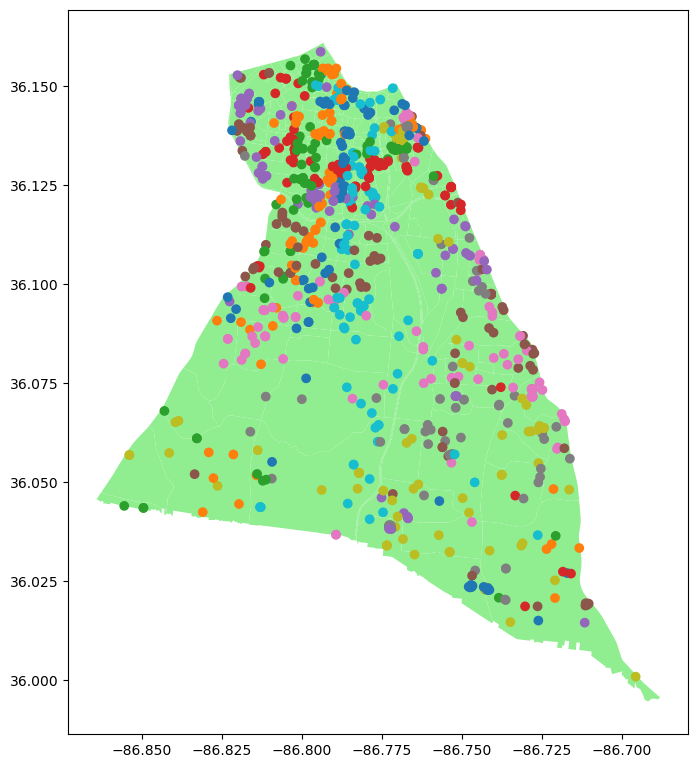

In [42]:
ax = poly_by_8.plot(figsize = (8, 10), color = 'lightgreen')
perm_by_8.plot( ax = ax, column = 'Address');
plt.show();

In [43]:
poly_by_8.geometry.centroid

/var/folders/xm/zcj7d6494pd3w3f_ptrhh9lr0000gn/T/ipykernel_17728/1998529622.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  poly_by_8.geometry.centroid


38      POINT (-86.79606 36.15846)
39      POINT (-86.79327 36.15918)
40      POINT (-86.79201 36.15618)
41      POINT (-86.78067 36.14851)
43      POINT (-86.78869 36.15474)
                   ...            
2037    POINT (-86.80516 36.11703)
2042    POINT (-86.78383 36.11312)
2045    POINT (-86.78953 36.11356)
2046    POINT (-86.80591 36.11064)
2047    POINT (-86.80882 36.12610)
Length: 318, dtype: geometry

In [44]:
center = poly_by_8.geometry.centroid[2047]
print(center)

POINT (-86.80881830473623 36.126098366092734)


/var/folders/xm/zcj7d6494pd3w3f_ptrhh9lr0000gn/T/ipykernel_17728/3819861229.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = poly_by_8.geometry.centroid[2047]


In [45]:
area_center = [center.y, center.x]
print(area_center)

[36.126098366092734, -86.80881830473623]


In [46]:
map_8 = folium.Map(location =  area_center, zoom_start = 12)
map_8

In [47]:
i = 0
for row_index, row_values in perm_by_8.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 1
values are:
 
Permit #                                                            T2022037366
Permit Type Description                            Building Residential - Rehab
Permit Subtype Description                              Single Family Residence
Parcel                                                              11809012700
Date Entered                                                6/6/2022 5:00:00 AM
Date Issued                                                                 NaN
Construction Cost                                                       1355715
Address                                                         2915 SNOWDEN RD
City                                                                  NASHVILLE
State                                                                        TN
Subdivision Lot                               LOT 8  MARENGO PK SUTTON HILL SEC
Contact                                                     Thomas Constructors
Permit Type    

In [50]:
map_8 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(poly_by_8).add_to(map_8)

for row_index, row_values in perm_by_8.iterrows():
    loc = [row_values['Lat'], row_values['Lon']]
    pop = str(row_values['Address'])
    icon=folium.Icon(color="blue",icon="building", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_8)
map_8.save('../maps/map_8.html')

#display our map
map_8